# Bài toán điều kiện biên 

Xét PVT biểu diễn bài toán điều kiện biên sau: $-d^2 u/dx^2 + qu = f(x)$ trên miền $a \le x \le b$ với các điều kiện biên: 
* $u = \alpha$ tại $x = a$ (ĐK biên dạng Dirichlet), và 
* $du/dx + \beta u = \gamma$ tại $x = b$ (ĐK biên dạng Robin). 

$$\frac {-u_{j-1} + u_j - u_{j+1} } {(\Delta x)^2} + q u_j - f_j = 0$$

Từ đó, có thể viết lại dưới dạng phương trình đại số tuyến tính: $$u_{j - 1} -(2 + q (\Delta x)^2) u_j + u_{j+1} = -f_j (\Delta x)^2$$ Và hình thành nên ma trận gồm $N$ ẩn ($j = 1, \dots, N$) với $N-2$ phương trình. 

Để có thể giải được, cần bổ sung hai điều kiện biên đã nêu ở đề bài. Do vậy, PT đầu trong hệ trở thành $u_1 = \alpha$ còn PT cuối trở thành $-u_{N-1} + (1 + \beta) u_N = \gamma \Delta x$.

Đặt $p = -(2 + q (\Delta x)^2)$ và $r_j = -f_j (\Delta x)^2$ để tiện biểu diễn các PT "giữa", ta có hệ phương trình ba đường chéo. Ở đây các hệ số bằng 0 thì được bỏ trống. $$\begin{bmatrix}
    1 & 0 & & & &  \\
    1 & p & 1 & & &  \\
      & 1 & p & 1 & & \\
      &   & . & . & . & \\
      &   &   & 1 & p & 1 \\
      &   &   &   & -1  & 1+\beta \\
    \end{bmatrix}
    \begin{Bmatrix}
        u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_{N-1} \\ u_N
    \end{Bmatrix}
    =
    \begin{Bmatrix}
        \alpha \\ r_2 \\ r_3 \\ \vdots \\ r_{N-1} \\ \gamma \Delta x
    \end{Bmatrix}$$

Sử dụng thuật toán Thomas để tính ma trận:
```
for i = 2:N
	A[i] /= B[i]
    B[i] -= A[i]*C[i-1]
end
for i = 2:N
	R[i] -= A[i]*R[i-1]
end
U[N] = R[N] / B[N]
for i = N-1:-1:1
	U[i] = (R[i] - C[i] * U[i+1]) / B[i]
end
```

Các thông số chung:

In [53]:
a = 0
b = 1
N = 100
Δx = (b - a)/N
q = 1E4
p = -(2 + q*Δx^2)
α = -3.
β = 2.
γ = 100.
hàm = x -> cos((x - a)/(b - a)*π); # hàm số 

(anonymous function)

Thực hiện khởi tạo các vec tơ: 
* `A` là vec tơ đường chéo trái 
* `B` là vec tơ đường chéo chính
* `C` là vec tơ đường chéo phải 
* `R` là vec tơ vế phải 
* `U` là vec tơ nghiệm 

Các vec tơ này đều có cùng độ dài `N`.

In [54]:
A = zeros(N,1) + 1
B = zeros(N,1) + p
C = zeros(N,1) + 1
f = zeros(N,1)
R = zeros(N,1)
U = zeros(N,1)
for i = 1:N
    f[i] = hàm(a + i*Δx/(b-a))
    R[i] = -f[i]*Δx^2
end
A[N] = -1
B[1] = 1
B[N] = β*Δx + 1
C[1] = 0
R[1] = α
R[N] = γ*Δx;

Thực hiện giải bằng phương pháp Thomas 

In [9]:
function thomas(A::Array, B::Array, C::Array, R::Array)
    for i = 2:N  # Decomposition 
        A[i] /= B[i]
        B[i] -= A[i]*C[i-1]
    end
    for i = 2:N  # Forward elimination
        R[i] -= A[i]*R[i-1]
    end
    U[N] = R[N] / B[N]
    for i = N-1:-1:1 # Back substitution
        U[i] = (R[i] - C[i] * U[i+1]) / B[i]
    end
    return U
end

thomas (generic function with 2 methods)

In [56]:
U = thomas(A, B, C, R)
U'

1x100 Array{Float64,2}:
 -3.0  0.381013  0.14294  0.0477058  …  0.0702319  0.187435  0.499975

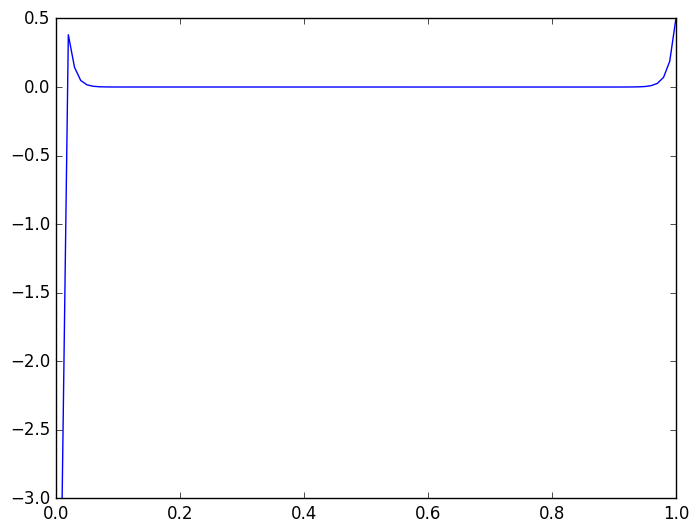

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fad5adda290>

In [59]:
using PyPlot

plot(a+(1:N)*Δx, U)